Source: https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook

# Titanic Machine Learning (replicated from Kaggle)

Packages

In [349]:
# Analysis
import pandas as pd
import numpy as np
import random as rnd

# Plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Data Import

In [350]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [351]:
# make columns in train_df lowercase
print(train_df.columns.values)
train_df.columns = map(str.lower, train_df.columns) # convert column names to lowercase
print(train_df.columns.values)

# make columns in test_df lowercase
print(test_df.columns.values)
test_df.columns = map(str.lower, test_df.columns)
print(test_df.columns.values)

# make a combined list of two dataframes
combine = [train_df, test_df]
combine

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['passengerid' 'survived' 'pclass' 'name' 'sex' 'age' 'sibsp' 'parch'
 'ticket' 'fare' 'cabin' 'embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
['passengerid' 'pclass' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked']


[     passengerid  survived  pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   name     sex   age  sibsp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

# EDA

In [352]:
# Data type for each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [353]:
train_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [354]:
train_df.info()
print('_' * 40)
test_df.info()
# we can see that survived is not included in test_df since it is something that we want to predict using machine learning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passenger

In [355]:
train_df.describe()
# shows statistics for numerical columns only (2 float (age & fare), 4 int (passengerid, pclass, sibsp, parch))

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [356]:
train_df.describe(include = 'O')
# putting include = 'O' inside describe gives statistics of object type columns

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Attalah, Mr. Sleiman",male,1601,B96 B98,S
freq,1,577,7,4,644


## Calculating Relationships between Survival Rate and Integer Columns

In [357]:
train_df[['pclass', 'survived']].groupby('pclass', as_index = False).mean().sort_values(by = 'survived', ascending = False)
# if we include as.index = False inside groupby(), the grouping column is inserted as another column in the dataframe

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [358]:
train_df[['sex', 'survived']].groupby('sex', as_index = False).mean().sort_values(by = 'survived', ascending = False)

,sex,survived
0,female,0.742038
1,male,0.188908


In [359]:
train_df[['sibsp', 'survived']].groupby('sibsp', as_index = False).mean().sort_values(by = 'survived', ascending = False)

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [360]:
train_df[['parch', 'survived']].groupby('parch', as_index = False).mean().sort_values(by = 'survived', ascending = False)

,parch,survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Histogram to Identify Survival Rate and Float Columns

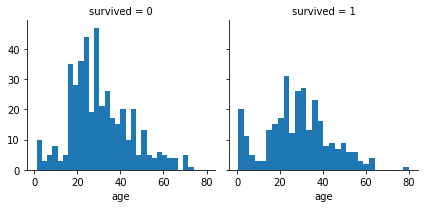

In [361]:
g = sns.FacetGrid(train_df, col = 'survived')
g.map(plt.hist, 'age', bins = 30)

We can see from this histogram that survival rate is correlated with age (babies' survival rate seems to be a lot higher compared to others, and people of age 20-30's survival rate is a lot lower than other ages)

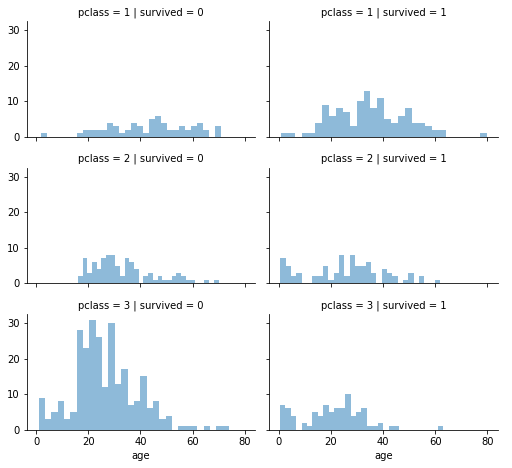

In [362]:
grid = sns.FacetGrid(train_df, col = 'survived', row = 'pclass', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'age', alpha = 0.5, bins = 30)
grid.add_legend()
# shows histogram by each combination of pclass and survived

Survival also seems to have depended on the ticket class (pclass) as 3rd class survived the least

## Survival Rate and Categorical Columns

C:\Users\lsh95\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\lsh95\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


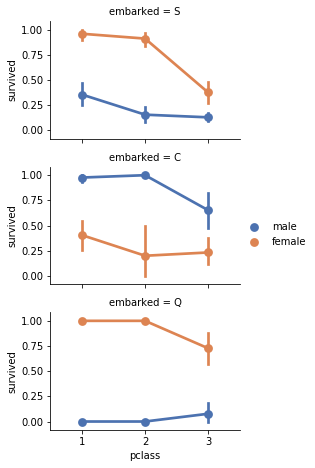

In [363]:
grid = sns.FacetGrid(train_df, row = 'embarked', height = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette = 'deep')
grid.add_legend()

Embarkment also seems to be correlated with survival: most men that embarked at Cherbourg survived, while men that embarked that Queenstown or Southampton was not able to survive as much. Furthermore, survival rates for male and female seems to vary by a lot

C:\Users\lsh95\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


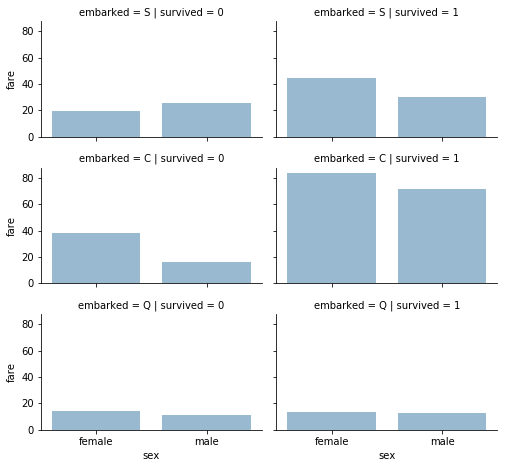

In [364]:
grid = sns.FacetGrid(train_df, row = 'embarked', col = 'survived', height = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha = 0.5, ci = None)
grid.add_legend()

People who paid higher fares (higher bars, Cherbourg) survived more than people who paid lower fares (Queenstown & Southampton)

## Filtering Out Data

In [365]:
test_df.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [366]:
# before removal
print(train_df.shape, test_df.shape)
train_df = train_df.drop(['ticket', 'cabin'], axis = 1)
test_df = test_df.drop(['ticket', 'cabin'], axis = 1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

(891, 12) (418, 11)


((891, 10), (418, 9))

We remove ticket and cabin since the two columns do not seem to be associated with survival

## Categorizing Titles

By looking at the titles of the passengers, we can try to see how their titles might be correlated with survival, before removing names and passengerid columns

In [367]:
for dataset in combine:
    dataset['title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand = False)

pd.crosstab(train_df['title'], train_df['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [368]:
# Titles other than Mr, Master, Miss, and Mrs are not common, so combine into one title and fix other abbreviations
for dataset in combine:
    dataset['title'] = dataset['title'].replace('Mlle', 'Miss') # Mlle - Mademoiselle
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Miss') # Mme - Madame
    dataset['title'] = dataset['title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major',
                                                 'Rev', 'Sir', 'Dona'], 'Rare')

print(train_df['title'].value_counts())
train_df[['title', 'survived']].groupby('title', as_index = False).mean()

Mr        517
Miss      186
Mrs       125
Master     40
Rare       23
Name: title, dtype: int64


,title,survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.347826


We can see from this that sex should definitely be correlated to survival, as women's (Miss & Mrs) survival rate was a lot higher than men's

Since we have extracted the titles from the two datasets, we can safely drop name and passengerid columns from the dataframes

In [369]:
train_df = train_df.drop(['name', 'passengerid'], axis = 1)
test_df = test_df.drop(['name', 'passengerid'], axis = 1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 8))

## Converting Categorical Columns to Ordinal

In [370]:
# Titles
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in combine:
    dataset['title'] = dataset['title'].map(title_mapping)
    dataset['title'] = dataset['title'].fillna(0)

train_df['title'].value_counts()

1    517
2    186
3    125
4     40
5     23
Name: title, dtype: int64

In [371]:
# Sex
for dataset in combine:
    dataset['sex'] = dataset['sex'].map({'male': 0, 'female': 1}).astype(int)

train_df['sex'].value_counts()

0    577
1    314
Name: sex, dtype: int64

## Filling in NA Values

For numerical columns, NA values should be filled in order to have a complete understanding of the values.

There are three ways for this:
1. filling in with a random number from distribution of column's mean and standard deviation
2. filling in with the median of the corresponding group (sex & pclass)
3. we can combine the above methods together and fill NA values with a random number from distribution of mean and sd, but finding the distribution according to the corresponding group

However, since 1 & 3 can introduce random noise in our data and distort the results during multiple executions, we use method 2

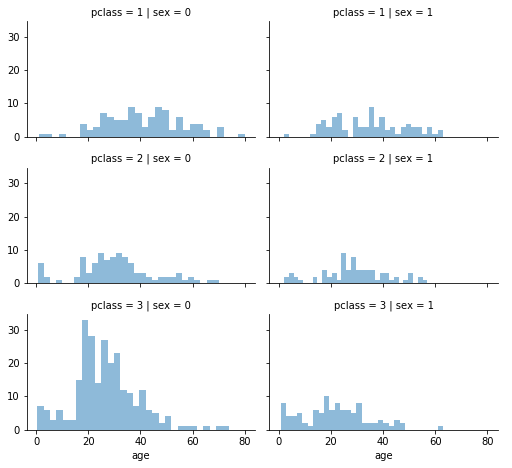

In [372]:
# Age, Sex, and Pclass correlation
grid = sns.FacetGrid(train_df, row = 'pclass', col = 'sex', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'age', alpha = 0.5, bins = 30)
grid.add_legend()

The grid shows that while 3rd class has a lot more people of age 20-40, 2nd and 1st class have a more normal distribution, and is also different by their sex.

In [373]:
# empty array for the replacements
guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [374]:
# iterate over sex = 0, 1 and pclass = 1, 2, 3 to calculate age guesses (medians) for each group
for dataset in combine:
    # calculate median age for each group and assign to guess_ages
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['sex'] == i) & (dataset['pclass'] == j + 1)]['age'].dropna()
            
            # if we were to find random numbers
            # age_mean = guess_df.mean()
            # age_sd = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            
            age_guess = guess_df.median()
            
            # convert age float to nearest 0.5 age
            guess_ages[i, j] = int(age_guess/0.5 + 0.5) * 0.5
            
    # replace NA values with corresponding median ages
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.age.isnull()) & (dataset.sex == i) & (dataset.pclass == j + 1), 'age'] = guess_ages[i, j]
    
    # convert all ages to integers
    dataset['age'] = dataset['age'].astype(int)

train_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


## Age Group and Survival Correlation

In [375]:
# defining age groups
train_df['ageband'] = pd.cut(train_df['age'], 5)
train_df.ageband.value_counts()

(16.0, 32.0]     495
(32.0, 48.0]     216
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: ageband, dtype: int64

In [376]:
# survival rate
train_df[['ageband', 'survived']].groupby('ageband', as_index = False).mean().sort_index() 
# sort_values(by = colname) can also be used

,ageband,survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


## Converting Age to Ordinal using Age Groups

In [377]:
for dataset in combine:
    dataset.loc[dataset['age'] <= 16, 'age'] = 0
    dataset.loc[ (dataset['age'] > 16) & (dataset['age'] <= 32), 'age'] = 1
    dataset.loc[ (dataset['age'] > 32) & (dataset['age'] <= 48), 'age'] = 2
    dataset.loc[ (dataset['age'] > 48) & (dataset['age'] <= 64), 'age'] = 3
    dataset.loc[dataset['age'] > 64, 'age']

Since we have changed age according to their age groups, we can now remove ageband column

In [379]:
train_df = train_df.drop(['ageband'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


## Finding Family Size (Sibsp + Parch)

In [381]:
for dataset in combine:
    dataset['familysize'] = dataset['sibsp'] + dataset['parch'] + 1

train_df[['familysize', 'survived']].groupby('familysize', as_index = False).mean().sort_values(by = 'survived', 
                                                                                                ascending = False)

,familysize,survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [382]:
# Alone vs Family
for dataset in combine:
    dataset['isalone'] = 0
    dataset.loc[dataset['familysize'] == 1, 'isalone'] = 1

train_df[['isalone', 'survived']].groupby('isalone', as_index = False).mean()

,isalone,survived
0,0,0.505650
1,1,0.303538


In [383]:
# Drop other columns in favor of isalone column
train_df = train_df.drop(['parch', 'sibsp', 'familysize'], axis = 1)
test_df = test_df.drop(['parch', 'sibsp', 'familysize'], axis = 1)
combine = [train_df, test_df]

In [384]:
train_df.head()

,survived,pclass,sex,age,fare,embarked,title,isalone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [385]:
# new column of age * pclass
for dataset in combine:
    dataset['age*class'] = dataset['age'] * dataset['pclass']

train_df.loc[:, ['age*class', 'age', 'pclass']].head(10)

,age*class,age,pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


## Filling in Embarked

There are two NA values in Embarked column. Since there is not much of missing value, we simply fill in with the most occuring value

In [392]:
freq_port = train_df['embarked'].dropna().mode()[0]
freq_port

'S'

In [394]:
# fill in for NA values
for dataset in combine:
    dataset['embarked'] = dataset['embarked'].fillna(freq_port)

train_df[['embarked', 'survived']].groupby(['embarked'], as_index = False).mean().sort_values(by = 'survived', 
                                                                                              ascending = False)

,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [395]:
# change embarked to ordinal
for dataset in combine:
    dataset['embarked'] = dataset['embarked'].map( {'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
train_df.head()

,survived,pclass,sex,age,fare,embarked,title,isalone,age*class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6
